# Raw asymmetry calculation for 2018 MagUp data
## LHCb internship summer 2022

### Artemis Bouzaki 11/07/2022

In [1]:
#import all necessary libraries
import uproot
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from scipy.optimize import curve_fit 
import scipy.constants as sc
from scipy.stats import norm
import matplotlib.mlab as mlab
from scipy.stats import crystalball 
from scipy.stats import johnsonsu
import matplotlib.patches as mpl_patches

In [2]:
## This part is very hardcoded but different loops that I attempted did not seem to read all the data files
## apologies for that

# open root files

# path = r'/eos/lhcb/user/e/egersa/promptD0Kpi/data/2018/up/'
data1 = uproot.open(r'/eos/lhcb/user/e/egersa/promptD0Kpi/data/2018/up/DVNtuple0.root')
data2 = uproot.open(r'/eos/lhcb/user/e/egersa/promptD0Kpi/data/2018/up/DVNtuple1.root')
data3 = uproot.open(r'/eos/lhcb/user/e/egersa/promptD0Kpi/data/2018/up/DVNtuple3.root')
data4 = uproot.open(r'/eos/lhcb/user/e/egersa/promptD0Kpi/data/2018/up/DVNtuple4.root')
data5 = uproot.open(r'/eos/lhcb/user/e/egersa/promptD0Kpi/data/2018/up/DVNtuple5.root')
data6 = uproot.open(r'/eos/lhcb/user/e/egersa/promptD0Kpi/data/2018/up/DVNtuple6.root')
data7 = uproot.open(r'/eos/lhcb/user/e/egersa/promptD0Kpi/data/2018/up/DVNtuple7.root')
data8 = uproot.open(r'/eos/lhcb/user/e/egersa/promptD0Kpi/data/2018/up/DVNtuple8.root')
data9 = uproot.open(r'/eos/lhcb/user/e/egersa/promptD0Kpi/data/2018/up/DVNtuple9.root')
data10 = uproot.open(r'/eos/lhcb/user/e/egersa/promptD0Kpi/data/2018/up/DVNtuple10.root')
data11 = uproot.open(r'/eos/lhcb/user/e/egersa/promptD0Kpi/data/2018/up/DVNtuple11.root')
data12 = uproot.open(r'/eos/lhcb/user/e/egersa/promptD0Kpi/data/2018/up/DVNtuple12.root')
data13 = uproot.open(r'/eos/lhcb/user/e/egersa/promptD0Kpi/data/2018/up/DVNtuple13.root')
data14 = uproot.open(r'/eos/lhcb/user/e/egersa/promptD0Kpi/data/2018/up/DVNtuple14.root')
data15 = uproot.open(r'/eos/lhcb/user/e/egersa/promptD0Kpi/data/2018/up/DVNtuple15.root')
data16 = uproot.open(r'/eos/lhcb/user/e/egersa/promptD0Kpi/data/2018/up/DVNtuple16.root')
data17 = uproot.open(r'/eos/lhcb/user/e/egersa/promptD0Kpi/data/2018/up/DVNtuple17.root')
data18 = uproot.open(r'/eos/lhcb/user/e/egersa/promptD0Kpi/data/2018/up/DVNtuple18.root')


## The following commands can be uncommented to view tuples

# print(data1.keys())
# print(data1['D02Kpi_Tuple/DecayTree;1'])
# print('Input data variables:')
# print(data1['D02Kpi_Tuple/DecayTree;1'].keys())


In [3]:
# Constants

k_plus_mass = 493.677 # MeV
pi_minus_mass = 139.57039 # MeV
D_meson_mass = 1864.84 # MeV

# arrays to hold the data
P1_PT = []
P2_PT = []
D0_ETA = []
D0_PT = []
D0_MM = [] # invariant mass
D0_M = [] # kinematic mass

D0_KIN = [] # kinematic mass for D0
D0_ANTI_KIN = [] # kinematic mass for anti-D0

D0_INV = [] # invariant mass of D0
D0_ANTI_INV = [] # invariant mass of anti-D0
 

# A counter for bookkeeping
event_counter = 0

# Set to -1 to run over all events. 
MAX_EVENTS = -1

# This loop goes over the trees to be analysed
## This part in the code combines the trees from all the opened files together into a single dataset
trees = [data1['D02Kpi_Tuple/DecayTree;1'], data2['D02Kpi_Tuple/DecayTree;1'], data3['D02Kpi_Tuple/DecayTree;1'],
         data4['D02Kpi_Tuple/DecayTree;1'], data5['D02Kpi_Tuple/DecayTree;1'], data6['D02Kpi_Tuple/DecayTree;1'],
         data7['D02Kpi_Tuple/DecayTree;1'], data8['D02Kpi_Tuple/DecayTree;1'], data9['D02Kpi_Tuple/DecayTree;1'],
         data10['D02Kpi_Tuple/DecayTree;1'], data11['D02Kpi_Tuple/DecayTree;1'], data12['D02Kpi_Tuple/DecayTree;1'],
         data13['D02Kpi_Tuple/DecayTree;1'], data14['D02Kpi_Tuple/DecayTree;1'], data15['D02Kpi_Tuple/DecayTree;1'],
         data16['D02Kpi_Tuple/DecayTree;1'], data17['D02Kpi_Tuple/DecayTree;1'], data18['D02Kpi_Tuple/DecayTree;1']]   

# This loop goes over the trees to be analysed
for tree in trees:
    
    # This outer loop is a technical loop of uproot over chunks of events
    for data in tree.iterate(['P1_PZ','P2_PZ','P1_PT','P2_PT', 'D0_PT','D0_ETA','P2_ProbNNpi',
                              'P1_isMuon','P2_isMuon','D0_MM', 'D0_M', 'D0_ID', 'D0_PT', 'D0_ETA']):
        
         # Append data from file for invariant and kinematic mass
         
            
#              event_counter += 1
#              if 0 < MAX_EVENTS and MAX_EVENTS < event_counter: break
#              if 0 == (event_counter % 100000): print('Read', event_counter, 'events')
                
            
            # Decide which events to analyse
            for i in range(0,len(data['P1_PZ'])):
                if (data['P1_PZ'][i] < 0) or (data['P2_PZ'][i] < 0): continue  
                if (data['P1_isMuon'][i] == 1) or (data['P2_isMuon'][i] == 1): continue

            # Filtered data directly from the file
            for i in range(0,len(data['D0_M'])):
                D0_MM.append(data['D0_MM'][i]) 
                D0_M.append(data['D0_M'][i])
                D0_PT.append(data['D0_PT'][i])
                D0_ETA.append(data['D0_ETA'][i])
        
                if data['D0_ID'][i] == 421:
                    D0_KIN.append(data['D0_M'][i])
                    D0_INV.append(data['D0_MM'][i])
            
                elif data['D0_ID'][i] == -421:
                    D0_ANTI_KIN.append(data['D0_M'][i])
                    D0_ANTI_INV.append(data['D0_MM'][i])

            


Plotting 1D histogram


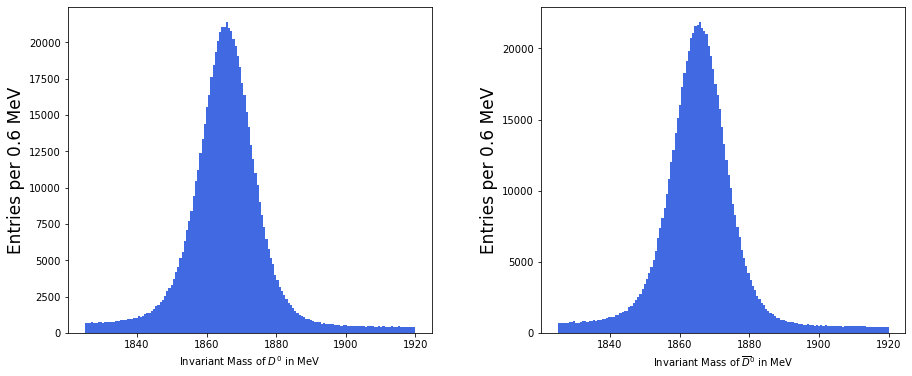

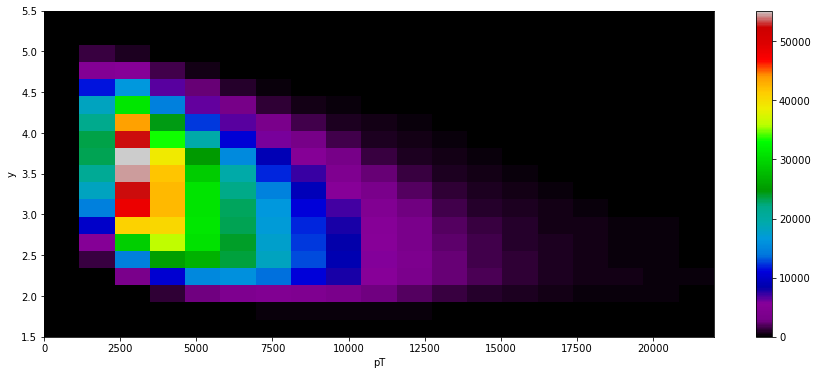

In [12]:
# This creates two figures in the same row.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
fig.subplots_adjust(wspace=0.3) # increase horizontal space between plots

# This plots two 1D-histograms for invariant mass of D0 and D0bar.
print('Plotting 1D histogram')
maxx = 1920
minn = 1825
bins = 150

values1, bins1, patches1 = ax[0].hist(D0_INV, bins = bins, range = [minn, maxx],  histtype='stepfilled',
           color='royalblue')

ax[0].set_xlabel('Invariant Mass of $D^{0}$ in MeV')
ax[0].set_ylabel('Entries per '+ str(round((maxx-minn)/bins, 1)) + " MeV", fontsize=17)
# ax[0].legend()
values2, bins2, patches2 = ax[1].hist(D0_ANTI_INV, bins = bins, range = [minn, maxx], histtype='stepfilled',
           color='royalblue')
ax[1].set_xlabel(r'Invariant Mass of $\overline{D}^{0}$ in MeV')
ax[1].set_ylabel('Entries per '+ str(round((maxx-minn)/bins, 1)) + " MeV", fontsize=17)
#ax[1].legend()  ## use only if there is a label in the histogram


## 2D histogram y-pt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
fig.subplots_adjust(wspace=0.3) # increase horizontal space between plots

ybins = np.linspace(1.5,5.5,20)
xbins = np.linspace(0,22000,20)
plt.hist2d(D0_PT, D0_ETA, bins =[xbins, ybins], cmap = plt.cm.nipy_spectral)
plt.xlabel("pT")
plt.ylabel("y")
plt.margins(0)
plt.colorbar()
plt.show()

In [5]:
## Those constants will be used as starting values for curve_fit
# Mean, standard deviation and normal of the gaussian for the kinematic mass dataset
mu_kin = np.mean(D0_M)
sigma_kin = np.std(D0_M)
norm1_kin = norm.pdf(D0_M)
# Mean, standard deviation and normal of the gaussian for the invariant mass dataset
mu_inv = np.mean(D0_MM)
sigma_inv = np.std(D0_MM)
norm1_inv = norm.pdf(D0_MM)

# Define bin width used for calculation of asymmetries later
bin_width = (minn-maxx)/bins 

# Define style of text box that includes value of chi2 in fits
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# Define all necessary functions for the models that follow

def exponential(x, norm, decay): 

    xoffset = 100 # move the position at which the function evaluates to "norm" ?
    return np.array(norm * np.exp(-(x-xoffset)/decay)) 

def constant(x, norm):
    
    return np.array( norm )

def line(x, grad, intercept):
    
    return np.array(grad*x + intercept)

def gaussian(x, mean, sd, norm): 
    
    return norm * np.array(1/(sd*np.sqrt(2*np.pi)) * np.exp(-1/2 * (x - mean)**2 / sd**2)) 

def gaussian2(x, mean, sd, norm): 
    
    return norm * np.array(1/(sd*np.sqrt(2*np.pi)) * np.exp(-1/2 * (x -mean)**2 / sd**2)) 

def gaussian3(x, mean, sd, norm): 
    
    return norm * np.array(1/(sd*np.sqrt(2*np.pi)) * np.exp(-1/2 * (x -mean)**2 / sd**2)) 

def crystal_ball(x, beta, m1, loc, scale, norm):
    
    return norm * np.array(crystalball.pdf(x, beta, m1, loc, scale)) 

def johnson(x, a, b, loc, scale, norm):
    
    return norm * np.array(johnsonsu.pdf(x, a, b, loc, scale)) 


def relativistic_breit_wigner(x, resonance_mass, width, normalization):
    
    gamma = np.sqrt(resonance_mass ** 2 * (resonance_mass ** 2 + width ** 2))
    k = 2.0 * np.sqrt(2) * resonance_mass * width * gamma / (np.pi * np.sqrt(resonance_mass ** 2 + gamma))
    return np.array(normalization * k / ((x ** 2 - resonance_mass ** 2) ** 2 + resonance_mass ** 2 * width ** 2))

def peak_gaus(x,loc,sd2,normG2): 
    
    return gaussian2(x,loc,sd2,normG2) 

def peak_crys(x, b, m1, loc, scale, norm): 
    
    return np.array(crystal_ball(x, b, m1, loc, scale, norm)) 

def peak_johnson(x, a, b, loc, scale, norm):
   
    return  np.array(johnson(x, a, b, loc, scale, norm))



## Model 1: Gauss (+ line for background)

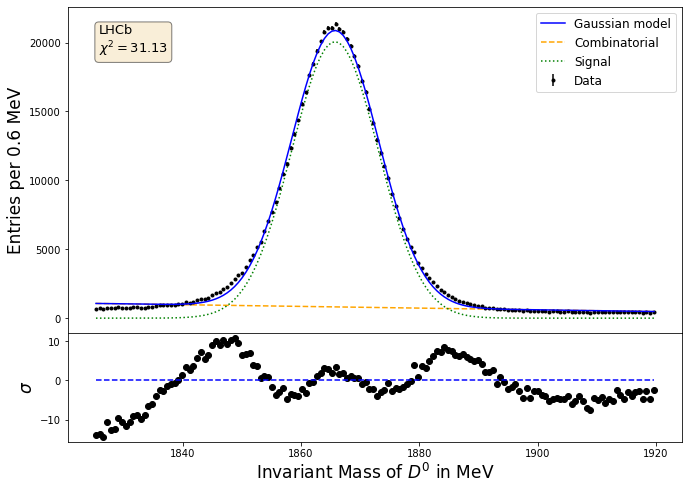

Fit results with chi2/ndf 4668.918774696033 / 150 = 31.12612516464022
Par 1: -6.183268 +/- 0.758424
Par 2: 12353.548285 +/- 1423.948412
Par 3: 1865.750969 +/- 0.028451
Par 4: 7.332737 +/- 0.031252
Par 5: 368688.698483 +/- 1616.003341


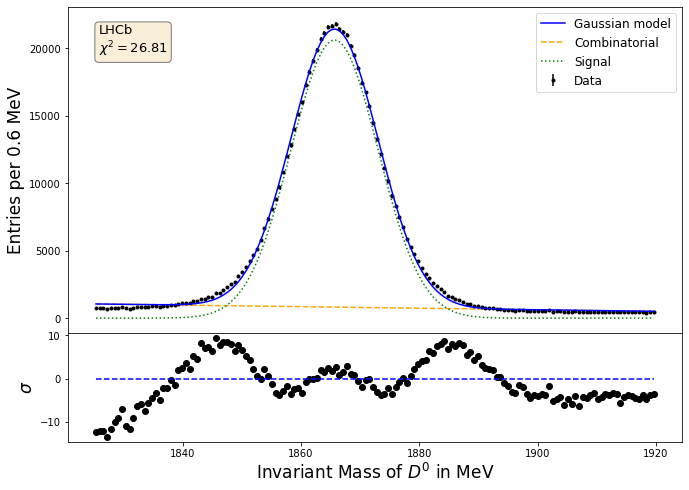

Fit results with chi2/ndf 4021.071456882115 / 150 = 26.807143045880768
Par 1: -5.770146 +/- 0.688285
Par 2: 11584.223903 +/- 1292.320094
Par 3: 1865.664874 +/- 0.025151
Par 4: 7.354521 +/- 0.027644
Par 5: 379927.898428 +/- 1469.987657


In [6]:
def fit_function_line (x, grad, intercept, mean, sd, normG): # combines all fitting functions
    
    return np.array(line(x, grad, intercept) + gaussian2(x, mean, sd, normG)) 


def fit_data(bins, values, minX, maxX, p0):
    # determine bin centres
    bin_centres = [(a+b)/2 for a,b in zip(bins[0:-1],bins[1:]) ] # uses simultaneous loop over two arrays

    # reduce range to fit only part of curve
    bin_centres_red = [] 
    values_red = []
    for c,v in zip(bin_centres,values):
        if c < minX or c > maxX: continue
        bin_centres_red.append(c)
        values_red.append(v)

    # execute the fit with starting values as given in p0
    coeff_fit,cov_fit = curve_fit(fit_function_line, bin_centres_red,values_red, p0) # fit
    
    # evaluate chi2
    fit_vals = [fit_function_line(x,coeff_fit[0],coeff_fit[1],coeff_fit[2], coeff_fit[3], coeff_fit[4]) for x in bin_centres_red]
    chi2parts = np.array((np.divide(np.array(values_red) - np.array(fit_vals), np.sqrt( values_red ), 
                                      out = np.array(values_red), where = np.array(values_red) != 0 ) )**2 )
    chi2 = np.sum(chi2parts)
    
    return coeff_fit,cov_fit, bin_centres, bin_centres_red, chi2, len(chi2parts) #returns ndf

def print_results(coeff,cov,chi2,ndf):
    perr = np.sqrt(np.diag(cov)) # extract errors from covariance matrix
    # output fit results
    print('Fit results with chi2/ndf', chi2,'/',ndf,'=', chi2/ndf)
    parcount = 0
    for p,e in zip(coeff,perr):
        parcount += 1
        print('Par {:d}: {:f} +/- {:f}'.format(parcount,p,e))

# The following function plots the data, background and fitting
def plot_results(bin_centres, bin_centres_red, values, coeff_fit, chi2, ndf): 
    
    x_fit = np.linspace(bin_centres_red[0],bin_centres_red[-1], bins) 
    y_fit = fit_function_line(x_fit, coeff_fit[0], coeff_fit[1], coeff_fit[2], coeff_fit[3], coeff_fit[4])
    fig,(ax0,ax1) = plt.subplots(nrows=2, sharex=True, gridspec_kw={'height_ratios': [3, 1], 'hspace': 0}, figsize=(11,8)) 
    ax0.errorbar(bin_centres, values, yerr=np.sqrt(values), linestyle='', marker='.',
                 markerfacecolor='k', markeredgecolor='k', ecolor='k', label='Data') 
    ax0.plot(x_fit, y_fit,label='Gaussian model',color='b', zorder=10) # zorder makes sure the fit line is on top 
    ax0.plot(x_fit, line(x_fit, coeff_fit[0], coeff_fit[1]), linestyle='--', label='Combinatorial', color='orange')
    ax0.plot(x_fit,peak_gaus(x_fit, coeff_fit[2], coeff_fit[3], coeff_fit[4]), label=r'Signal',
             linestyle='dotted', color='g') 
    # plot decoration 
    ##This part adds box with chi2 value in graph
    text ='\n'.join((r'LHCb', r'$\chi^{2}=%.2f$' % (chi2/ndf, )))
    ax0.text(0.05,0.95, text, fontsize=13, transform = ax0.transAxes, verticalalignment='top', horizontalalignment='left', bbox=props)
    ax0.legend(fontsize=12) 
    ## This part plots fit and normalised residuals
    ax1.set_xlabel(r'Invariant Mass of $D^{0}$ in MeV', fontsize=17) 
    ax0.set_ylabel('Entries per '+ str(round((maxx-minn)/bins, 1)) + " MeV", fontsize=17)
    residuals = (values - y_fit) / np.sqrt(values) 
    ax1.scatter(bin_centres, residuals, color='black') 
    y_arr = np.zeros(len(bin_centres)) 
    ax1.plot(bin_centres, y_arr, color='b', linestyle='--', zorder=10) 
    ax1.set_ylabel(r'$\sigma$', fontsize=17) 
    plt.show()
                                          
coeff1, cov1, bin_centres1, bin_centres_red1, chi2_1, ndf1 = fit_data(bins1, values1, minn, maxx, [-0.9, 1800, mu_inv, sigma_kin, 300000] )
coeff2, cov2, bin_centres2, bin_centres_red2, chi2_2, ndf2 = fit_data(bins2, values2, minn, maxx, [-0.9, 1800, mu_inv, sigma_inv, 300000] ) 
 
# plot result and values for D0 mass
plot_results(bin_centres1, bin_centres_red1, values1, coeff1, chi2_1, ndf1)
print_results(coeff1,cov1, chi2_1, ndf1)
# print('Invariant mass is centered at', round(coeff1[2],2) ,'MeV and has FWHM', round(2.355*coeff1[3], 2), 'MeV.')

# plot result and values for D0bar mass
plot_results(bin_centres2, bin_centres_red2, values2, coeff2, chi2_2, ndf2)
print_results(coeff2,cov2, chi2_2, ndf2)
# print('Invariant mass is centered at', round(coeff2[2], 2), 'MeV and has FWHM' ,round(2.355*coeff2[3], 2), 'MeV.')


## Model 2: Gauss + Gauss (+line for background)


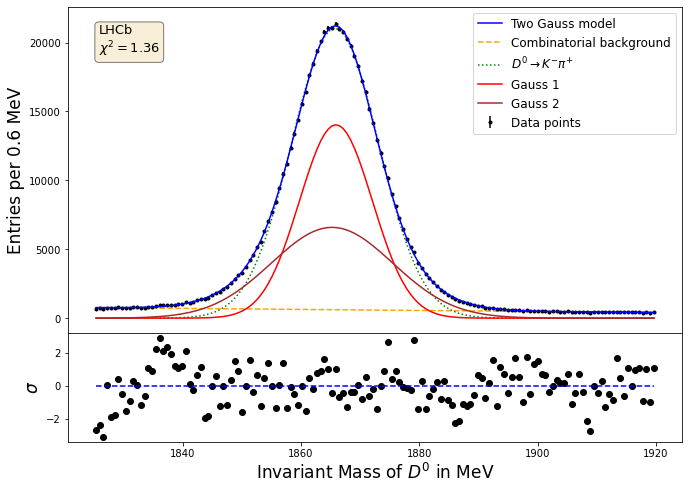

Fit results with chi2/ndf 203.62674964895592 / 150 = 1.3575116643263727
Par 1: -3.737138 +/- 0.251624
Par 2: 7585.256903 +/- 475.526547
Par 3: 1865.898479 +/- 0.020219
Par 4: 6.169679 +/- 0.063085
Par 5: 216963.573137 +/- 9364.104836
Par 6: 1865.240255 +/- 0.068324
Par 7: 10.269991 +/- 0.198479
Par 8: 169584.511475 +/- 8878.411150


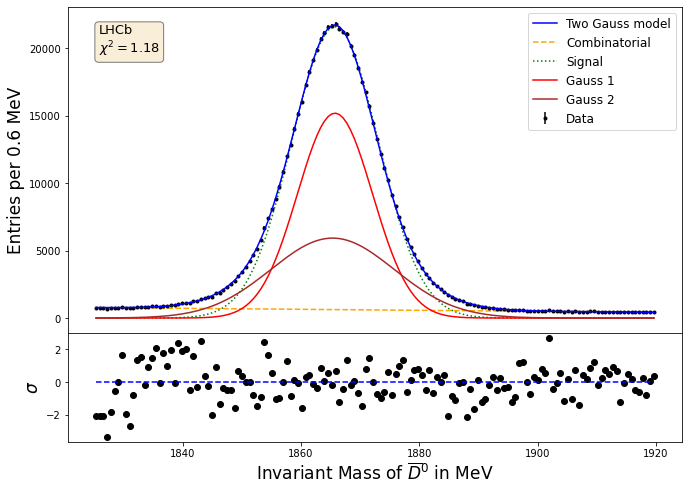

Fit results with chi2/ndf 176.83027513924856 / 150 = 1.1788685009283237
Par 1: -3.672918 +/- 0.230767
Par 2: 7478.681293 +/- 436.254407
Par 3: 1865.738721 +/- 0.016962
Par 4: 6.350015 +/- 0.057433
Par 5: 241659.792640 +/- 9489.125249
Par 6: 1865.328824 +/- 0.064934
Par 7: 10.452797 +/- 0.218102
Par 8: 155232.932667 +/- 9013.188464
-0.013204112633398666 0.0008990321346574226
The percentage raw asymmetry is -1.32 +/- 0.09 %.


In [7]:
def fit_function(x, grad, intercept, mean, sd, normG, mean2, sd2, normG2): # combines all fitting functions
    
    return np.array(line(x, grad, intercept) + gaussian(x, mean, sd, normG) + gaussian2(x, mean2,sd2, normG2)) 

def fit_data_gaus(bins, values, minX, maxX, p0):
    # determine bin centres
    bin_centres = [(a+b)/2 for a,b in zip(bins[0:-1],bins[1:]) ] # uses simultaneous loop over two arrays

    # reduce range to fit only part of curve
    bin_centres_red = [] 
    values_red = []
    for c,v in zip(bin_centres,values):
        if c < minX or c > maxX: continue
        bin_centres_red.append(c)
        values_red.append(v)

    # execute the fit with starting values as given in p0
    coeff_fit,cov_fit = curve_fit(fit_function, bin_centres_red,values_red, p0) # fit
    
    # evaluate chi2
    fit_vals = [fit_function(x,coeff_fit[0],coeff_fit[1],coeff_fit[2], coeff_fit[3],coeff_fit[4],coeff_fit[5],coeff_fit[6], coeff_fit[7]) for x in bin_centres_red]
    chi2parts = np.array((np.divide(np.array(values_red) - np.array(fit_vals), np.sqrt(values_red), 
                                    out = np.array(values_red), where = np.array(values_red) != 0))**2 )
    chi2 = np.sum(chi2parts)
    
    return coeff_fit,cov_fit, bin_centres, bin_centres_red, chi2, len(chi2parts)
 
def plot_results_gaus(bin_centres, bin_centres_red, values, coeff_fit, chi2, ndf): 

    x_fit = np.linspace(bin_centres_red[0],bin_centres_red[-1],bins) 
    y_fit = fit_function(x_fit, coeff_fit[0], coeff_fit[1], coeff_fit[2], coeff_fit[3],coeff_fit[4],coeff_fit[5],coeff_fit[6], coeff_fit[7])
    fig,(ax0,ax1) = plt.subplots(nrows=2, sharex=True, gridspec_kw={'height_ratios': [3, 1], 'hspace': 0}, figsize=(11,8)) 
    ax0.errorbar(bin_centres, values, yerr=np.sqrt(values), linestyle='', marker='.',
                  markerfacecolor='k', markeredgecolor='k', ecolor='k', label='Data points') 
    ax0.plot(x_fit, y_fit,label='Two Gauss model',color='b', zorder=10) # zorder makes sure the fit line is on top 
    ax0.plot(x_fit, line(x_fit, coeff_fit[0], coeff_fit[1]), linestyle='--', label='Combinatorial background', color='orange')
    ax0.plot(x_fit,peak_gaus(x_fit, coeff1[2], coeff1[3] , abs(coeff_fit[4]) + abs(coeff_fit[7])), 
              label=r'$D^{0} \rightarrow K^{-}\pi^{+}$',
              linestyle='dotted', color='g')
    ax0.plot(x_fit,peak_gaus(x_fit, coeff_fit[2], coeff_fit[3],coeff_fit[4]), 
              label=r'Gauss 1', color='r')
    ax0.plot(x_fit,peak_gaus(x_fit, coeff_fit[5], coeff_fit[6],coeff_fit[7]), 
              label=r'Gauss 2', color='brown')
    # plot decoration 
    ##This part adds box with chi2 value in graph
    text ='\n'.join((r'LHCb', r'$\chi^{2}=%.2f$' % (chi2/ndf, )))
    ax0.text(0.05,0.95, text, fontsize=13, transform = ax0.transAxes, verticalalignment='top', horizontalalignment='left', bbox=props)
    ax0.legend(fontsize=12) 
    ## This part plots fit and normalised residuals
    ax1.set_xlabel(r'Invariant Mass of $D^{0}$ in MeV', fontsize=17) 
    ax0.set_ylabel('Entries per '+ str(round((maxx-minn)/bins, 1)) + " MeV", fontsize=17)
    residuals = (values - y_fit) / np.sqrt(values) 
    ax1.scatter(bin_centres, residuals, color='black') 
    y_arr = np.zeros(len(bin_centres)) 
    ax1.plot(bin_centres, y_arr, color='b', linestyle='--') 
    ax1.set_ylabel(r'$\sigma$', fontsize=17) 
    plt.show()
    
def plot_results_gausbar(bin_centres, bin_centres_red, values, coeff_fit, chi2, ndf): 

    x_fit = np.linspace(bin_centres_red[0],bin_centres_red[-1],bins) 
    y_fit = fit_function(x_fit, coeff_fit[0], coeff_fit[1], coeff_fit[2], coeff_fit[3],coeff_fit[4],coeff_fit[5],coeff_fit[6], coeff_fit[7])
    fig,(ax0,ax1) = plt.subplots(nrows=2, sharex=True, gridspec_kw={'height_ratios': [3, 1], 'hspace': 0}, figsize=(11,8)) 
    ax0.errorbar(bin_centres, values, yerr=np.sqrt(values), linestyle='', marker='.',
                  markerfacecolor='k', markeredgecolor='k', ecolor='k', label='Data') 
    ax0.plot(x_fit, y_fit,label='Two Gauss model',color='b', zorder=10) # zorder makes sure the fit line is on top 
    ax0.plot(x_fit, line(x_fit, coeff_fit[0], coeff_fit[1]), linestyle='--', label='Combinatorial', color='orange')
    ax0.plot(x_fit, peak_gaus(x_fit, coeff1[2], coeff1[3] , abs(coeff_fit[4]) + abs(coeff_fit[7])), 
              label=r'Signal',
              linestyle='dotted', color='g')
    ax0.plot(x_fit,peak_gaus(x_fit, coeff_fit[2], coeff_fit[3],coeff_fit[4]), 
              label=r'Gauss 1', color='r')
    ax0.plot(x_fit,peak_gaus(x_fit, coeff_fit[5], coeff_fit[6],coeff_fit[7]), 
              label=r'Gauss 2', color='brown')
    # plot decoration 
    ##This part adds box with chi2 value in graph
    text ='\n'.join((r'LHCb', r'$\chi^{2}=%.2f$' % (chi2/ndf, )))
    ax0.text(0.05,0.95, text, fontsize=13, transform = ax0.transAxes, verticalalignment='top', horizontalalignment='left', bbox=props)
    ax0.legend(fontsize=12) 
    ## This part plots fit and normalised residuals 
    ax1.set_xlabel(r'Invariant Mass of $\overline{D}^{0}$ in MeV', fontsize=17) 
    ax0.set_ylabel('Entries per '+ str(round((maxx-minn)/bins, 1)) + " MeV", fontsize=17)
    residuals = (values - y_fit) / np.sqrt(values) 
    ax1.scatter(bin_centres, residuals, color='black') 
    y_arr = np.zeros(len(bin_centres)) 
    ax1.plot(bin_centres, y_arr, color='b', linestyle='--') 
    ax1.set_ylabel(r'$\sigma$', fontsize=17) 
    plt.show()
    
# set initial conditions for fit    
coeff4, cov4, bin_centres4, bin_centres_red4, chi2_4, ndf4 = fit_data_gaus(bins1, values1, minn, maxx, [-0.02, 1000, mu_inv, sigma_inv, 180000, 
                                                                                                        mu_inv, sigma_inv, 180000] ) 
coeff13, cov13, bin_centres13, bin_centres_red13, chi2_13, ndf13 = fit_data_gaus(bins2, values2, minn, maxx, [-0.02, 1000, mu_inv, sigma_inv, 180000, 
                                                                                                        mu_inv, sigma_inv, 180000] ) 
#plot fit for D0
plot_results_gaus(bin_centres4, bin_centres_red4, values1, coeff4, chi2_4, ndf4)
print_results(coeff4, cov4, chi2_4, ndf4)

#plot fit for D0bar
plot_results_gausbar(bin_centres13, bin_centres_red13, values2, coeff13, chi2_13, ndf13)
print_results(coeff13, cov13, chi2_13, ndf13)


# raw asymmetry calculation for this model
N_D0_TWOGAUS = abs((coeff4[4] + coeff4[7])/bin_width) 
N_ANTI_D0_TWOGAUS = abs((coeff13[4] + coeff13[7])/bin_width)
A_TWOGAUS = (N_D0_TWOGAUS - N_ANTI_D0_TWOGAUS)/(N_D0_TWOGAUS + N_ANTI_D0_TWOGAUS)
errA_TWOGAUS = np.sqrt((1-(A_TWOGAUS**2))/(N_D0_TWOGAUS + N_ANTI_D0_TWOGAUS)) 

#print asymmetry results and error
print( A_TWOGAUS , errA_TWOGAUS) 
print('The percentage raw asymmetry is', round(A_TWOGAUS*100, 2), '+/-', round(errA_TWOGAUS*100, 2), '%.')



## Model 3: Gauss + Gauss + Gauss (+ line for background)

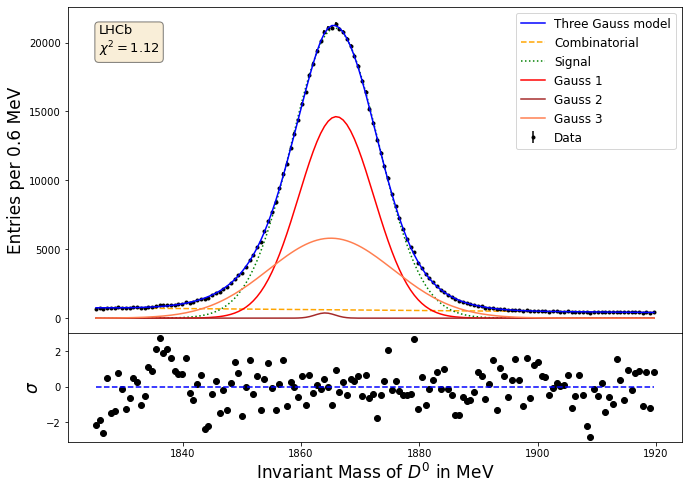

Fit results with chi2/ndf 168.04356459176654 / 150 = 1.120290430611777
Par 1: -3.537907 +/- 0.223904
Par 2: 7206.692403 +/- 423.591059
Par 3: 1865.950605 +/- 0.021717
Par 4: 6.331445 +/- 0.060563
Par 5: 232099.243774 +/- 8585.679738
Par 6: 1864.062883 +/- 0.201980
Par 7: 1.694072 +/- 0.264511
Par 8: 1601.698674 +/- 388.446091
Par 9: 1865.039629 +/- 0.083366
Par 10: 10.545454 +/- 0.203492
Par 11: 153373.687761 +/- 8222.541591


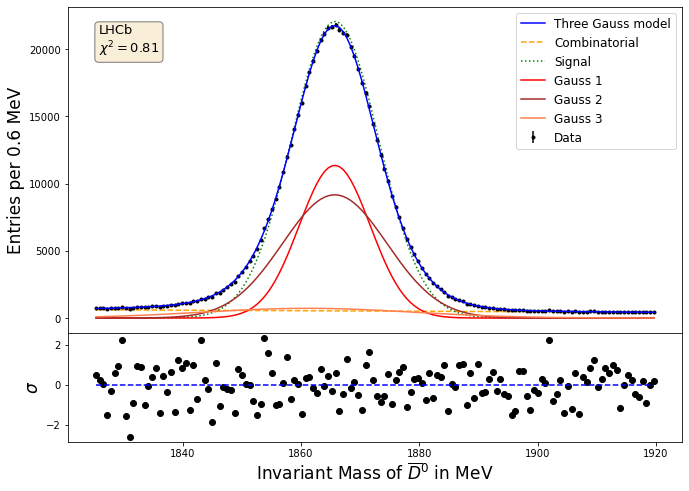

Fit results with chi2/ndf 121.80213049397167 / 150 = 0.8120142032931444
Par 1: -1.966231 +/- 1.689680
Par 2: 4202.234158 +/- 3250.382139
Par 3: 1865.695234 +/- 0.041621
Par 4: 5.996676 +/- 0.202903
Par 5: 170633.149514 +/- 39349.774092
Par 6: 1865.698767 +/- 0.127910
Par 7: 8.813008 +/- 0.705700
Par 8: 202402.337698 +/- 25176.243494
Par 9: 1861.111974 +/- 5.208587
Par 10: 17.759638 +/- 7.062498
Par 11: 32203.945517 +/- 11948.866587
-0.0229262654413953 0.0008938267036999246
The percentage raw asymmetry is -2.29 +/- 0.09 %.


In [8]:
## Note that this fit usually does not converge well.

def fit_triple_gaus(x, grad, intercept, mean, sd, normG, mean2, sd2, normG2, mean3, sd3, normG3): # combines all fitting functions
    
    return np.array(line(x, grad, intercept) + gaussian(x, mean, sd, normG) + gaussian2(x, mean2,sd2, normG2) +
                    gaussian3(x, mean3,sd3, normG3)) 

def fit_data_triple_gaus(bins, values, minX, maxX, p0):
    # determine bin centres
    bin_centres = [(a+b)/2 for a,b in zip(bins[0:-1],bins[1:]) ] # uses simultaneous loop over two arrays

    # reduce range to fit only part of curve
    bin_centres_red = [] 
    values_red = []
    for c,v in zip(bin_centres,values):
        if c < minX or c > maxX: continue
        bin_centres_red.append(c)
        values_red.append(v)

    # execute the fit with starting values as given in p0
    coeff_fit,cov_fit = curve_fit(fit_triple_gaus, bin_centres_red,values_red, p0) # fit
    
    # evaluate chi2
    fit_vals = [fit_triple_gaus(x,coeff_fit[0],coeff_fit[1],coeff_fit[2], coeff_fit[3],coeff_fit[4],coeff_fit[5],
                                coeff_fit[6], coeff_fit[7], coeff_fit[8],coeff_fit[9], coeff_fit[10]) for x in bin_centres_red]
    chi2parts = np.array((np.divide(np.array(values_red) - np.array(fit_vals), np.sqrt(values_red), 
                                    out = np.array(values_red), where = np.array(values_red) != 0))**2 )
    chi2 = np.sum(chi2parts)
    
    return coeff_fit,cov_fit, bin_centres, bin_centres_red, chi2, len(chi2parts)
 
def plot_results_triple_gaus(bin_centres, bin_centres_red, values, coeff_fit, chi2, ndf): 
    x_fit = np.linspace(bin_centres_red[0],bin_centres_red[-1],bins) 
    y_fit = fit_triple_gaus(x_fit, coeff_fit[0], coeff_fit[1], coeff_fit[2], coeff_fit[3],coeff_fit[4],coeff_fit[5],
                            coeff_fit[6], coeff_fit[7], coeff_fit[8],coeff_fit[9], coeff_fit[10])
    fig,(ax0,ax1) = plt.subplots(nrows=2, sharex=True, gridspec_kw={'height_ratios': [3, 1], 'hspace': 0}, figsize=(11,8)) 
    ax0.errorbar(bin_centres, values, yerr=np.sqrt(values), linestyle='', marker='.',
                  markerfacecolor='k', markeredgecolor='k', ecolor='k', label='Data') 
    ax0.plot(x_fit, y_fit,label='Three Gauss model',color='b', zorder=10) # zorder makes sure the fit line is on top 
    ax0.plot(x_fit, line(x_fit, coeff_fit[0], coeff_fit[1]), linestyle='--', label='Combinatorial', color='orange') 
    ax0.plot(x_fit,peak_gaus(x_fit, coeff1[2], coeff1[3] , abs(coeff_fit[4]) + abs(coeff_fit[7]) + abs(coeff_fit[10])), 
              label=r'Signal',
              linestyle='dotted', color='g')
    ax0.plot(x_fit,peak_gaus(x_fit, coeff_fit[2], coeff_fit[3],coeff_fit[4]), 
              label=r'Gauss 1', color='r')
    ax0.plot(x_fit,peak_gaus(x_fit, coeff_fit[5], coeff_fit[6],coeff_fit[7]), 
              label=r'Gauss 2', color='brown')
    ax0.plot(x_fit,peak_gaus(x_fit, coeff_fit[8], coeff_fit[9],coeff_fit[10]), 
              label=r'Gauss 3', color='coral')
    # plot decoration 
    ##This part adds box with chi2 value in graph
    text ='\n'.join((r'LHCb', r'$\chi^{2}=%.2f$' % (chi2/ndf, )))
    ax0.text(0.05,0.95, text, fontsize=13, transform = ax0.transAxes, verticalalignment='top', horizontalalignment='left', bbox=props)
    ax0.legend(fontsize=12) 
    ## This part plots fit and normalised residuals 
    ax1.set_xlabel(r'Invariant Mass of $D^{0}$ in MeV', fontsize=17) 
    ax0.set_ylabel('Entries per '+ str(round((maxx-minn)/bins, 1)) + " MeV", fontsize=17)
    residuals = (values - y_fit) / np.sqrt(values) 
    ax1.scatter(bin_centres, residuals, color='black') 
    y_arr = np.zeros(len(bin_centres)) 
    ax1.plot(bin_centres, y_arr, color='b', linestyle='--') 
    ax1.set_ylabel(r'$\sigma$', fontsize=17) 
    plt.show()
    
def plot_results_triple_gausbar(bin_centres, bin_centres_red, values, coeff_fit, chi2, ndf): 
    x_fit = np.linspace(bin_centres_red[0],bin_centres_red[-1],bins) 
    y_fit = fit_triple_gaus(x_fit, coeff_fit[0], coeff_fit[1], coeff_fit[2], coeff_fit[3],coeff_fit[4],coeff_fit[5],
                            coeff_fit[6], coeff_fit[7], coeff_fit[8],coeff_fit[9], coeff_fit[10])
    fig,(ax0,ax1) = plt.subplots(nrows=2, sharex=True, gridspec_kw={'height_ratios': [3, 1], 'hspace': 0}, figsize=(11,8)) 
    ax0.errorbar(bin_centres, values, yerr=np.sqrt(values), linestyle='', marker='.',
                  markerfacecolor='k', markeredgecolor='k', ecolor='k', label='Data') 
    ax0.plot(x_fit, y_fit,label='Three Gauss model',color='b', zorder=10) # zorder makes sure the fit line is on top 
    ax0.plot(x_fit, line(x_fit, coeff_fit[0], coeff_fit[1]), linestyle='--', label='Combinatorial', color='orange') 
    ax0.plot(x_fit,peak_gaus(x_fit, coeff1[2], coeff1[3] , abs(coeff_fit[4]) + abs(coeff_fit[7]) + abs(coeff_fit[10])), 
              label=r'Signal',
              linestyle='dotted', color='g')
    ax0.plot(x_fit,peak_gaus(x_fit, coeff_fit[2], coeff_fit[3],coeff_fit[4]), 
              label=r'Gauss 1', color='r')
    ax0.plot(x_fit,peak_gaus(x_fit, coeff_fit[5], coeff_fit[6],coeff_fit[7]), 
              label=r'Gauss 2', color='brown')
    ax0.plot(x_fit,peak_gaus(x_fit, coeff_fit[8], coeff_fit[9],coeff_fit[10]), 
              label=r'Gauss 3', color='coral')
    # plot decoration 
    ##This part adds box with chi2 value in graph
    text ='\n'.join((r'LHCb', r'$\chi^{2}=%.2f$' % (chi2/ndf, )))
    ax0.text(0.05,0.95, text, fontsize=13, transform = ax0.transAxes, verticalalignment='top', horizontalalignment='left', bbox=props)
    ax0.legend(fontsize=12) 
    ## This part plots fit and normalised residuals
    ax1.set_xlabel(r'Invariant Mass of $\overline{D}^{0}$ in MeV', fontsize=17) 
    ax0.set_ylabel('Entries per '+ str(round((maxx-minn)/bins, 1)) + " MeV", fontsize=17)
    residuals = (values - y_fit) / np.sqrt(values) 
    ax1.scatter(bin_centres, residuals, color='black') 
    y_arr = np.zeros(len(bin_centres)) 
    ax1.plot(bin_centres, y_arr, color='b', linestyle='--') 
    ax1.set_ylabel(r'$\sigma$', fontsize=17) 
    plt.show()
    
#set initial conditions for fit    
coeff5, cov5, bin_centres5, bin_centres_red5, chi2_5, ndf5 = fit_data_triple_gaus(bins1, values1, minn, maxx, 
                                                                                  [-0.02, 1000, mu_inv, sigma_inv, 
                                                                                    100000, mu_inv, sigma_inv,100000,
                                                                                    mu_inv, sigma_inv, 120000])

    
coeff9, cov9, bin_centres9, bin_centres_red9, chi2_9, ndf9 = fit_data_triple_gaus(bins2, values2, minn, maxx, 
                                                                                  [-0.02, 1000, mu_inv, sigma_inv, 
                                                                                    10000, mu_inv, sigma_inv,10000,
                                                                                    mu_inv, sigma_inv, 10000])
#plot fit for D0
plot_results_triple_gaus(bin_centres5, bin_centres_red5, values1, coeff5, chi2_5, ndf5)
print_results(coeff5,cov5, chi2_5, ndf5)

#plot fit for D0 bar
plot_results_triple_gausbar(bin_centres9, bin_centres_red9, values2, coeff9, chi2_9, ndf9)
print_results(coeff9,cov9, chi2_9, ndf9)

# raw asymmetry calculation for this model

N_D0_GAUS = abs((coeff5[4] + coeff5[7] + coeff5[10])/bin_width)
N_ANTI_D0_GAUS= abs((coeff9[4] + coeff9[7] + coeff9[10])/bin_width) 
A_GAUS = (N_D0_GAUS - N_ANTI_D0_GAUS)/(N_D0_GAUS + N_ANTI_D0_GAUS)
errA_GAUS = np.sqrt((1-(A_GAUS**2))/(N_D0_GAUS + N_ANTI_D0_GAUS)) 

#print asymmetry results
print(A_GAUS, errA_GAUS)
print('The percentage raw asymmetry is', round(A_GAUS*100, 2), '+/-', round(errA_GAUS*100, 2), '%.')



## Model 4: Johnson (+ line for background)


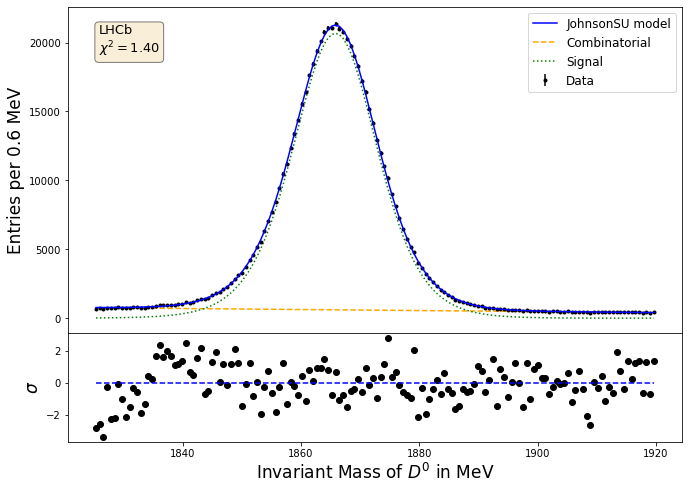

Fit results with chi2/ndf 209.35032601845143 / 150 = 1.3956688401230095
Par 1: -3.724845 +/- 0.243679
Par 2: 7554.924230 +/- 459.405566
Par 3: 0.096381 +/- 0.011432
Par 4: 2.177514 +/- 0.033787
Par 5: 1866.411894 +/- 0.080351
Par 6: 16.266726 +/- 0.242065
Par 7: 387320.806606 +/- 781.285327


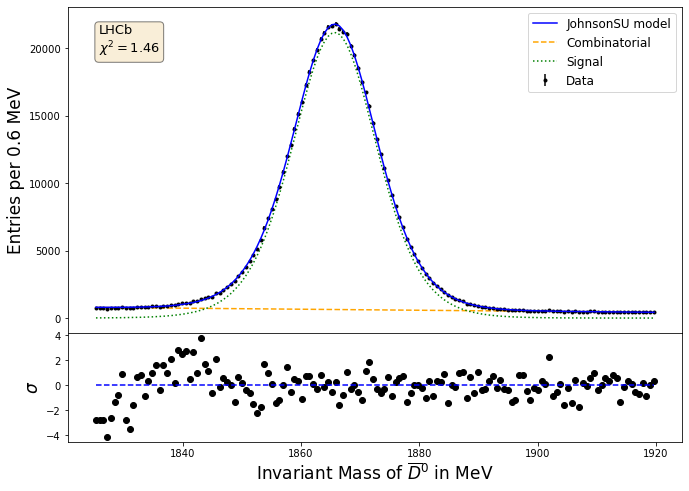

Fit results with chi2/ndf 219.60853383889128 / 150 = 1.4640568922592752
Par 1: -3.796284 +/- 0.227845
Par 2: 7715.658592 +/- 429.362804
Par 3: 0.059693 +/- 0.011731
Par 4: 2.344347 +/- 0.036694
Par 5: 1866.074988 +/- 0.083112
Par 6: 17.519943 +/- 0.264916
Par 7: 396368.041136 +/- 710.561757
-0.011544421687961126 0.0008989083153332085
The percentage raw asymmetry is -1.15 +/- 0.09 %.


In [9]:
def fit_johnson(x, grad, intercept, a, b, loc, scale, norm): # combines all fitting functions
    
    return np.array(line(x, grad, intercept) + johnson(x, a, b, loc, scale, norm)) 

def fit_data_johnson(bins, values, minX, maxX, p0):
    # determine bin centres
    bin_centres = [(a+b)/2 for a,b in zip(bins[0:-1],bins[1:]) ] # uses simultaneous loop over two arrays

    # reduce range to fit only part of curve
    bin_centres_red = [] 
    values_red = []
    for c,v in zip(bin_centres,values):
        if c < minX or c > maxX: continue
        bin_centres_red.append(c)
        values_red.append(v)

    # execute the fit with starting values as given in p0
    coeff_fit,cov_fit = curve_fit(fit_johnson, bin_centres_red,values_red, p0) # fit
    
    # evaluate chi2
    fit_vals = [fit_johnson(x,coeff_fit[0],coeff_fit[1],coeff_fit[2], coeff_fit[3],coeff_fit[4],coeff_fit[5],
                                coeff_fit[6]) for x in bin_centres_red]
    chi2parts = np.array((np.divide(np.array(values_red) - np.array(fit_vals), np.sqrt(values_red), 
                                    out = np.array(values_red), where = np.array(values_red) != 0))**2 )
    chi2 = np.sum(chi2parts)
    
    return coeff_fit,cov_fit, bin_centres, bin_centres_red, chi2, len(chi2parts)
 
def plot_results_johnson(bin_centres, bin_centres_red, values, coeff_fit, chi2, ndf): 
    x_fit = np.linspace(bin_centres_red[0],bin_centres_red[-1],bins) 
    y_fit = fit_johnson(x_fit, coeff_fit[0], coeff_fit[1], coeff_fit[2], coeff_fit[3],coeff_fit[4],coeff_fit[5],
                            coeff_fit[6])
    fig,(ax0,ax1) = plt.subplots(nrows=2, sharex=True, gridspec_kw={'height_ratios': [3, 1], 'hspace': 0}, figsize=(11,8)) 
    ax0.errorbar(bin_centres, values, yerr=np.sqrt(values), linestyle='', marker='.',
                  markerfacecolor='k', markeredgecolor='k', ecolor='k', label='Data') 
    ax0.plot(x_fit, y_fit,label='JohnsonSU model',color='b', zorder=10) # zorder makes sure the fit line is on top 
    ax0.plot(x_fit, line(x_fit, coeff_fit[0], coeff_fit[1]), linestyle='--', label='Combinatorial', color='orange')
    ax0.plot(x_fit,peak_johnson(x_fit, coeff_fit[2], coeff_fit[3],coeff_fit[4],coeff_fit[5],
                                coeff_fit[6]), label=r'Signal',linestyle='dotted', color='g')
    # plot decoration 
    ##This part adds box with chi2 value in graph
    text ='\n'.join((r'LHCb', r'$\chi^{2}=%.2f$' % (chi2/ndf, )))
    ax0.text(0.05,0.95, text, fontsize=13, transform = ax0.transAxes, verticalalignment='top', horizontalalignment='left', bbox=props)
    ax0.legend(fontsize=12) 
    ## This part plots fit and normalised residuals
    ax1.set_xlabel(r'Invariant Mass of $D^{0}$ in MeV', fontsize=17) 
    ax0.set_ylabel('Entries per '+ str(round((maxx-minn)/bins, 1)) + " MeV", fontsize=17)
    residuals = (values - y_fit) / np.sqrt(values) 
    ax1.scatter(bin_centres, residuals, color='black') 
    y_arr = np.zeros(len(bin_centres)) 
    ax1.plot(bin_centres, y_arr, color='b', linestyle='--') 
    ax1.set_ylabel(r'$\sigma$', fontsize=17) 
    plt.show()
    
def plot_results_johnsonbar(bin_centres, bin_centres_red, values, coeff_fit, chi2, ndf): 
    x_fit = np.linspace(bin_centres_red[0],bin_centres_red[-1],bins) 
    y_fit = fit_johnson(x_fit, coeff_fit[0], coeff_fit[1], coeff_fit[2], coeff_fit[3],coeff_fit[4],coeff_fit[5],
                            coeff_fit[6])
    fig,(ax0,ax1) = plt.subplots(nrows=2, sharex=True, gridspec_kw={'height_ratios': [3, 1], 'hspace': 0}, figsize=(11,8)) 
    ax0.errorbar(bin_centres, values, yerr=np.sqrt(values), linestyle='', marker='.',
                  markerfacecolor='k', markeredgecolor='k', ecolor='k', label='Data') 
    ax0.plot(x_fit, y_fit,label='JohnsonSU model',color='b', zorder=10) # zorder makes sure the fit line is on top 
    ax0.plot(x_fit, line(x_fit, coeff_fit[0], coeff_fit[1]), linestyle='--', label='Combinatorial', color='orange')
    ax0.plot(x_fit,peak_johnson(x_fit, coeff_fit[2], coeff_fit[3],coeff_fit[4],coeff_fit[5],
                                coeff_fit[6]), label=r'Signal',linestyle='dotted', color='g')
    # plot decoration 
    ##This part adds box with chi2 value in graph
    text ='\n'.join((r'LHCb', r'$\chi^{2}=%.2f$' % (chi2/ndf, )))
    ax0.text(0.05,0.95, text, fontsize=13, transform = ax0.transAxes, verticalalignment='top', horizontalalignment='left', bbox=props)
    ax0.legend(fontsize=12) 
    ## This part plots fit and normalised residuals
    ax1.set_xlabel(r'Invariant Mass of $\overline{D}^{0}$ in MeV', fontsize=17) 
    ax0.set_ylabel('Entries per '+ str(round((maxx-minn)/bins, 1)) + " MeV", fontsize=17)
    residuals = (values - y_fit) / np.sqrt(values) 
    ax1.scatter(bin_centres, residuals, color='black') 
    y_arr = np.zeros(len(bin_centres)) 
    ax1.plot(bin_centres, y_arr, color='b', linestyle='--') 
    ax1.set_ylabel(r'$\sigma$', fontsize=17) 
    plt.show()

#set initial conditions for fit
coeff6, cov6, bin_centres6, bin_centres_red6, chi2_6, ndf6 = fit_data_johnson(bins1, values1, minn, maxx, 
                                                                                  [-0.02, 150, -0.01, 3, mu_inv, sigma_inv, 300000]) 
    
coeff7, cov7, bin_centres7, bin_centres_red7, chi2_7, ndf7 = fit_data_johnson(bins2, values2, minn, maxx, 
                                                                                  [-0.02, 150, -0.01, 3, mu_inv, sigma_inv, 300000]) 

#plot fit for D0
plot_results_johnson(bin_centres6, bin_centres_red6, values1, coeff6, chi2_6, ndf6)
print_results(coeff6,cov6, chi2_6, ndf6)

#plot fit for D0bar
plot_results_johnsonbar(bin_centres7, bin_centres_red7, values2, coeff7, chi2_7, ndf7)
print_results(coeff7,cov7, chi2_7, ndf7)

# raw asymmetry calculation for this model
N_D0_JOHN = abs((coeff6[6])/bin_width) 
N_ANTI_D0_JOHN = abs((coeff7[6])/bin_width)
A_JOHN = (N_D0_JOHN - N_ANTI_D0_JOHN)/(N_D0_JOHN + N_ANTI_D0_JOHN)
errA_JOHN = np.sqrt((1-(A_JOHN**2))/(N_D0_JOHN + N_ANTI_D0_JOHN)) 
print(A_JOHN, errA_JOHN)
print('The percentage raw asymmetry is', round(A_JOHN*100, 2), '+/-', round(errA_JOHN*100, 2), '%.')

## Model 5: Johnson + Gauss (+line for backgrond)


In [10]:
def fit_johnsongaus(x, grad, intercept, a, b, loc, scale, norm, mean, sd, normG): # combines all fitting functions
    
    return np.array(line(x, grad, intercept) + johnson(x, a, b, loc, scale, norm) + gaussian2(x, mean, sd, normG)) 

def fit_data_johnsongaus(bins, values, minX, maxX, p0):
    # determine bin centres
    bin_centres = [(a+b)/2 for a,b in zip(bins[0:-1],bins[1:]) ] # uses simultaneous loop over two arrays

    # reduce range to fit only part of curve
    bin_centres_red = [] 
    values_red = []
    for c,v in zip(bin_centres,values):
        if c < minX or c > maxX: continue
        bin_centres_red.append(c)
        values_red.append(v)

    # execute the fit with starting values as given in p0
    coeff_fit,cov_fit = curve_fit(fit_johnsongaus, bin_centres_red,values_red, p0) # fit
    
    # evaluate chi2
    fit_vals = [fit_johnsongaus(x,coeff_fit[0],coeff_fit[1],coeff_fit[2], coeff_fit[3],coeff_fit[4],coeff_fit[5],
                                coeff_fit[6], coeff_fit[7],coeff_fit[8], coeff_fit[9]) for x in bin_centres_red]
    chi2parts = np.array((np.divide(np.array(values_red) - np.array(fit_vals), np.sqrt(values_red), 
                                    out = np.array(values_red), where = np.array(values_red) != 0))**2 )
    chi2 = np.sum(chi2parts)
    
    return coeff_fit,cov_fit, bin_centres, bin_centres_red, chi2, len(chi2parts)
 
def plot_results_johnsongaus(bin_centres, bin_centres_red, values, coeff_fit, chi2, ndf): 

    x_fit = np.linspace(bin_centres_red[0],bin_centres_red[-1],bins) 
    y_fit = fit_johnsongaus(x_fit, coeff_fit[0], coeff_fit[1], coeff_fit[2], coeff_fit[3],coeff_fit[4],coeff_fit[5],
                            coeff_fit[6], coeff_fit[7],coeff_fit[8], coeff_fit[9])
    fig,(ax0,ax1) = plt.subplots(nrows=2, sharex=True, gridspec_kw={'height_ratios': [3, 1], 'hspace': 0}, figsize=(11,8)) 
    ax0.errorbar(bin_centres, values, yerr=np.sqrt(values), linestyle='', marker='.',
                  markerfacecolor='k', markeredgecolor='k', ecolor='k', label='Data') 
    ax0.plot(x_fit, y_fit,label='Johnson/ Gauss model',color='b', zorder=10) # zorder makes sure the fit line is on top 
    ax0.plot(x_fit, line(x_fit, coeff_fit[0], coeff_fit[1]), linestyle='--', label='Combinatorial', color='orange')
    ax0.plot(x_fit,peak_johnson(x_fit,  coeff6[2], coeff6[3],coeff6[4],coeff6[5], abs(coeff_fit[6]) + abs(coeff_fit[9])), 
             label=r'Signal, linestyle='dotted', color='g')
    ax0.plot(x_fit,peak_gaus(x_fit, coeff_fit[7], coeff_fit[8],coeff_fit[9]), 
              label=r'Gauss', color='r')
    ax0.plot(x_fit,peak_johnson(x_fit, coeff_fit[2], coeff_fit[3],coeff_fit[4],coeff_fit[5],
                                coeff_fit[6]), label=r'JohnsonSU', color='brown')
    # plot decoration 
    ##This part adds box with chi2 value in graph
    text ='\n'.join((r'LHCb', r'$\chi^{2}=%.2f$' % (chi2/ndf, )))
    ax0.text(0.05,0.95, text, fontsize=13, transform = ax0.transAxes, verticalalignment='top', horizontalalignment='left', bbox=props)
    ax0.legend(fontsize=12) 
    ## This part plots fit and normalised residuals
    ax1.set_xlabel(r'Invariant Mass of $D^{0}$ in MeV', fontsize=17) 
    ax0.set_ylabel('Entries per '+ str(round((maxx-minn)/bins, 1)) + " MeV", fontsize=17)
    residuals = (values - y_fit) / np.sqrt(values) 
    ax1.scatter(bin_centres, residuals, color='black') 
    y_arr = np.zeros(len(bin_centres)) 
    ax1.plot(bin_centres, y_arr, color='b', linestyle='--') 
    ax1.set_ylabel(r'$\sigma$', fontsize=17) 
    plt.show()
    
def plot_results_johnsongausbar(bin_centres, bin_centres_red, values, coeff_fit, chi2, ndf): 

    x_fit = np.linspace(bin_centres_red[0],bin_centres_red[-1],bins) 
    y_fit = fit_johnsongaus(x_fit, coeff_fit[0], coeff_fit[1], coeff_fit[2], coeff_fit[3],coeff_fit[4],coeff_fit[5],
                            coeff_fit[6], coeff_fit[7],coeff_fit[8], coeff_fit[9])
    fig,(ax0,ax1) = plt.subplots(nrows=2, sharex=True, gridspec_kw={'height_ratios': [3, 1], 'hspace': 0}, figsize=(11,8)) 
    ax0.errorbar(bin_centres, values, yerr=np.sqrt(values), linestyle='', marker='.',
                  markerfacecolor='k', markeredgecolor='k', ecolor='k', label='Data') 
    ax0.plot(x_fit, y_fit,label='Johnson/ Gauss model',color='b', zorder=10) # zorder makes sure the fit line is on top 
    ax0.plot(x_fit, line(x_fit, coeff_fit[0], coeff_fit[1]), linestyle='--', label='Combinatorial', color='orange')
    ax0.plot(x_fit,peak_johnson(x_fit, coeff6[2], coeff6[3],coeff6[4],coeff6[5], abs(coeff_fit[6]) + abs(coeff_fit[9])), 
              label=r'Signal', linestyle='dotted', color='g')
    ax0.plot(x_fit,peak_gaus(x_fit, coeff_fit[7], coeff_fit[8],coeff_fit[9]), 
              label=r'Gauss', color='r')
    ax0.plot(x_fit,peak_johnson(x_fit, coeff_fit[2], coeff_fit[3],coeff_fit[4],coeff_fit[5],
                                coeff_fit[6]), label=r'JohnsonSU', color='brown')
    # plot decoration 
    ##This part adds box with chi2 value in graph
    text ='\n'.join((r'LHCb', r'$\chi^{2}=%.2f$' % (chi2/ndf, )))
    ax0.text(0.05,0.95, text, fontsize=13, transform = ax0.transAxes, verticalalignment='top', horizontalalignment='left', bbox=props)
    ax0.legend(fontsize=12) 
    ## This part plots fit and normalised residuals
    ax1.set_xlabel(r'Invariant Mass of $\overline{D}^{0}$ in MeV', fontsize=17) 
    ax0.set_ylabel('Entries per '+ str(round((maxx-minn)/bins, 1)) + " MeV", fontsize=17)
    residuals = (values - y_fit) / np.sqrt(values) 
    ax1.scatter(bin_centres, residuals, color='black') 
    y_arr = np.zeros(len(bin_centres)) 
    ax1.plot(bin_centres, y_arr, color='b', linestyle='--') 
    ax1.set_ylabel(r'$\sigma$', fontsize=17) 
    plt.show()
    
#set initial conditions for fit  
coeff8, cov8, bin_centres8, bin_centres_red8, chi2_8, ndf8 = fit_data_johnsongaus(bins1, values1, minn, maxx, 
                                                                                  [-0.8, 1000, 0.1, 2, mu_inv, sigma_inv, 10000, 
                                                                                    mu_inv, 15, 150000] ) 
coeff10, cov10, bin_centres10, bin_centres_red10, chi2_10, ndf10 = fit_data_johnsongaus(bins2, values2, minn, maxx, 
                                                                                  [-0.5, 1000, 0.1, 3, mu_inv, sigma_inv, 500000, 
                                                                                    mu_inv, sigma_inv, 500000] ) 
#plot fit for D0
plot_results_johnsongaus(bin_centres8, bin_centres_red8, values1, coeff8, chi2_8, ndf8)
print_results(coeff8, cov8, chi2_8, ndf8)
#plot fit for D0bar
plot_results_johnsongausbar(bin_centres10, bin_centres_red10, values2, coeff10, chi2_10, ndf10)
print_results(coeff10, cov10, chi2_10, ndf10)

# raw asymmetry calculation for this model
N_D0_JOHNGAUS = abs((coeff8[6] + coeff8[9])/bin_width) 
N_ANTI_D0_JOHNGAUS = abs((coeff10[6] + coeff10[9])/bin_width) 
A_JOHNGAUS = (N_D0_JOHNGAUS - N_ANTI_D0_JOHNGAUS)/(N_D0_JOHNGAUS + N_ANTI_D0_JOHNGAUS)
errA_JOHNGAUS = np.sqrt((1-(A_JOHNGAUS**2))/(N_D0_JOHNGAUS + N_ANTI_D0_JOHNGAUS)) 

#print results
print(A_JOHNGAUS, errA_JOHNGAUS)
print('The percentage raw asymmetry is', round(A_JOHNGAUS*100, 2), '+/-', round(errA_JOHNGAUS*100, 2), '%.')

SyntaxError: invalid syntax (1385656771.py, line 40)

## Model 6: Johnson + Gauss + Gauss (+line for background)


In [ ]:
def fit_johnsongaus2(x, grad, intercept, a, b, loc, scale, norm, mean, sd, normG, mean2, sd2, norm2): # combines all fitting functions
    
    return np.array(line(x, grad, intercept) + johnson(x, a, b, loc, scale, norm) + gaussian(x, mean, sd, normG) + gaussian2(x, mean2, sd2, norm2)) 

def fit_data_johnsongaus2(bins, values, minX, maxX, p0):
    # determine bin centres
    bin_centres = [(a+b)/2 for a,b in zip(bins[0:-1],bins[1:]) ] # uses simultaneous loop over two arrays

    # reduce range to fit only part of curve
    bin_centres_red = [] 
    values_red = []
    for c,v in zip(bin_centres,values):
        if c < minX or c > maxX: continue
        bin_centres_red.append(c)
        values_red.append(v)

    # execute the fit with starting values as given in p0
    coeff_fit,cov_fit = curve_fit(fit_johnsongaus2, bin_centres_red,values_red, p0) # fit
    
    # evaluate chi2
    fit_vals = [fit_johnsongaus2(x,coeff_fit[0],coeff_fit[1],coeff_fit[2], coeff_fit[3],coeff_fit[4],coeff_fit[5],
                                  coeff_fit[6], coeff_fit[7],coeff_fit[8], coeff_fit[9], 
                                  coeff_fit[10],coeff_fit[11], coeff_fit[12]) for x in bin_centres_red]
    chi2parts = np.array((np.divide(np.array(values_red) - np.array(fit_vals), np.sqrt(values_red), 
                                    out = np.array(values_red), where = np.array(values_red) != 0))**2 )
    chi2 = np.sum(chi2parts)
    
    return coeff_fit,cov_fit, bin_centres, bin_centres_red, chi2, len(chi2parts)
 
def plot_results_johnsongaus2(bin_centres, bin_centres_red, values, coeff_fit, chi2, ndf): 

    x_fit = np.linspace(bin_centres_red[0],bin_centres_red[-1],bins) 
    y_fit = fit_johnsongaus2(x_fit, coeff_fit[0], coeff_fit[1], coeff_fit[2], coeff_fit[3],coeff_fit[4],coeff_fit[5],
                            coeff_fit[6], coeff_fit[7],coeff_fit[8], coeff_fit[9], coeff_fit[10],coeff_fit[11], coeff_fit[12])
    fig,(ax0,ax1) = plt.subplots(nrows=2, sharex=True, gridspec_kw={'height_ratios': [3, 1], 'hspace': 0}, figsize=(11,8)) 
    ax0.errorbar(bin_centres, values, yerr=np.sqrt(values), linestyle='', marker='.',
                  markerfacecolor='k', markeredgecolor='k', ecolor='k', label='Data') 
    ax0.plot(x_fit, y_fit,label='Johnson/ Double Gauss model',color='b', zorder=10) # zorder makes sure the fit line is on top 
    ax0.plot(x_fit, line(x_fit, coeff_fit[0], coeff_fit[1]), linestyle='--', label='Combinatorial', color='orange')
    ax0.plot(x_fit,peak_johnson(x_fit, coeff6[2], coeff6[3],coeff6[4],coeff6[5], abs(coeff_fit[6]) + abs(coeff_fit[9]) + abs(coeff_fit[12])), 
              label=r'Signal', linestyle='dotted', color='g')
    ax0.plot(x_fit,peak_gaus(x_fit, coeff_fit[7], coeff_fit[8],coeff_fit[9]), 
              label=r'Gauss 1', color='brown')
    ax0.plot(x_fit,peak_gaus(x_fit, coeff_fit[10], coeff_fit[11],coeff_fit[12]), 
              label=r'Gauss 2', color='coral')
    ax0.plot(x_fit,peak_johnson(x_fit, coeff_fit[2], coeff_fit[3],coeff_fit[4],coeff_fit[5],
                                coeff_fit[6]), label=r'JohnsonSU', color='r')
    # plot decoration 
    text ='\n'.join((r'LHCb', r'$\chi^{2}=%.2f$' % (chi2/ndf, )))
    ax0.text(0.05,0.95, text, fontsize=13, transform = ax0.transAxes, verticalalignment='top', horizontalalignment='left', bbox=props)
    ax1.set_xlabel(r'Invariant Mass of $D^{0}$ in MeV', fontsize=17) 
    ax0.set_ylabel('Entries per '+ str(round((maxx-minn)/bins, 1)) + " MeV", fontsize=17)
    ax0.legend(fontsize=14)
    residuals = (values - y_fit) / np.sqrt(values) 
    ax1.scatter(bin_centres, residuals, color='black') 
    y_arr = np.zeros(len(bin_centres)) 
    ax1.plot(bin_centres, y_arr, color='b', linestyle='--') 
    ax1.set_ylabel(r'$\sigma$', fontsize=17) 
    plt.show()

def plot_results_johnsongausbar2(bin_centres, bin_centres_red, values, coeff_fit, chi2, ndf): 

    x_fit = np.linspace(bin_centres_red[0],bin_centres_red[-1],bins) 
    y_fit = fit_johnsongaus2(x_fit, coeff_fit[0], coeff_fit[1], coeff_fit[2], coeff_fit[3],coeff_fit[4],coeff_fit[5],
                            coeff_fit[6], coeff_fit[7],coeff_fit[8], coeff_fit[9], coeff_fit[10],coeff_fit[11], coeff_fit[12])
    fig,(ax0,ax1) = plt.subplots(nrows=2, sharex=True, gridspec_kw={'height_ratios': [3, 1], 'hspace': 0}, figsize=(11,8)) 
    ax0.errorbar(bin_centres, values, yerr=np.sqrt(values), linestyle='', marker='.',
                  markerfacecolor='k', markeredgecolor='k', ecolor='k', label='Data') 
    ax0.plot(x_fit, y_fit,label='Johnson/ Double Gauss model',color='b', zorder=10) # zorder makes sure the fit line is on top 
    ax0.plot(x_fit, line(x_fit, coeff_fit[0], coeff_fit[1]), linestyle='--', label='Combinatorial', color='orange')
    ax0.plot(x_fit,peak_johnson(x_fit, coeff6[2], coeff6[3],coeff6[4],coeff6[5], abs(coeff_fit[6]) + abs(coeff_fit[9]) + abs(coeff_fit[12])), 
              label=r'Signal', linestyle='dotted', color='g')
    ax0.plot(x_fit,peak_gaus(x_fit, coeff_fit[7], coeff_fit[8],coeff_fit[9]), 
              label=r'Gauss 1', color='brown')
    ax0.plot(x_fit,peak_gaus(x_fit, coeff_fit[10], coeff_fit[11],coeff_fit[12]), 
              label=r'Gauss 2', color='coral')
    ax0.plot(x_fit,peak_johnson(x_fit, coeff_fit[2], coeff_fit[3],coeff_fit[4],coeff_fit[5],
                                coeff_fit[6]), label=r'JohnsonSU', color='r')
    # plot decoration 
    text ='\n'.join((r'LHCb', r'$\chi^{2}=%.2f$' % (chi2/ndf, )))
    ax0.text(0.05,0.95, text, fontsize=13, transform = ax0.transAxes, verticalalignment='top', horizontalalignment='left', bbox=props)
    ax1.set_xlabel(r'Invariant Mass of $\overline{D}^{0}$ in MeV', fontsize=17) 
    ax0.set_ylabel('Entries per '+ str(round((maxx-minn)/bins, 1)) + " MeV", fontsize=17)
    ax0.legend(fontsize=14)
    residuals = (values - y_fit) / np.sqrt(values) 
    ax1.scatter(bin_centres, residuals, color='black')
    y_arr = np.zeros(len(bin_centres)) 
    ax1.plot(bin_centres, y_arr, color='b', linestyle='--') 
    ax1.set_ylabel(r'$\sigma$', fontsize=17) 
    plt.show()
    
coeff11, cov11, bin_centres11, bin_centres_red11, chi2_11, ndf11 = fit_data_johnsongaus2(bins1, values1, minn, maxx, 
                                                                                  [-0.02, 1000, 0.1, 2, mu_inv, sigma_inv, 100000, 
                                                                                    mu_inv, sigma_inv, 100000, mu_inv, sigma_inv, 100000] ) 
coeff12, cov12, bin_centres12, bin_centres_red12, chi2_12, ndf12 = fit_data_johnsongaus2(bins2, values2, minn, maxx, 
                                                                                  [-0.9, 1000, 0.1, 2, mu_inv, sigma_inv, 100000, 
                                                                                    mu_inv, sigma_inv, 100000, mu_inv, sigma_inv, 100000] ) 
#plot fit for D0
plot_results_johnsongaus2(bin_centres11, bin_centres_red11, values1, coeff11, chi2_11, ndf11)
print_results(coeff11, cov11, chi2_11, ndf11)

#plot fit for D0bar
plot_results_johnsongausbar2(bin_centres12, bin_centres_red12, values2, coeff12, chi2_12, ndf12)
print_results(coeff12, cov12, chi2_12, ndf12)

# raw asymmetry calculation for this model
N_D0_JOHNGAUS2 = (abs(coeff11[6]) + abs(coeff11[9]) + abs(coeff11[12]))/abs(bin_width)
N_ANTI_D0_JOHNGAUS2 = (abs(coeff12[6]) + abs(coeff12[9]) + abs(coeff12[12]))/abs(bin_width)
A_JOHNGAUS2 = (N_D0_JOHNGAUS2 - N_ANTI_D0_JOHNGAUS2)/(N_D0_JOHNGAUS2 + N_ANTI_D0_JOHNGAUS2)
errA_JOHNGAUS2 = np.sqrt((1-(A_JOHNGAUS2**2))/(N_D0_JOHNGAUS2 + N_ANTI_D0_JOHNGAUS2)) 
print(A_JOHNGAUS2, errA_JOHNGAUS2)

print('The percentage raw asymmetry is', round(A_JOHNGAUS2*100, 2), '+/-', round(errA_JOHNGAUS2*100, 2), '%.')

##  All asymmetries plotted together

In [ ]:
# plt.errorbar(A_TWOGAUS*100, 1, xerr=errA_TWOGAUS*100, linestyle='', marker='.', label = 'Two Gauss model')
# plt.errorbar(A_JOHN*100, 2, xerr= errA_JOHN*100, linestyle='', marker='.', label = 'Johnson model')
# plt.errorbar(A_JOHNGAUS*100, 3, xerr= errA_JOHNGAUS*100, linestyle='', marker='.',  label = 'Johnson/Gauss model')
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
#            ncol=3, fancybox=True, shadow=True)
# plt.set_xlabel(r'Asymmetry in %', fontsize=14)
# plt.show()